Adınız: Hilal Sevda Soyadınız: Akatekin Okul Numaranız: 2212721042 GitHub Repo Bağlantısı: https://github.com/kullanici_adi/CNN_siniflandirma

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

In [2]:
# Veri Seti Parametreleri
DATASET_DIR = 'dataset' 
IMAGE_SIZE = (64, 64)   # 64x64 piksel
BATCH_SIZE = 32         

# ImageDataGenerator Tanımlama
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) 

# Eğitim Seti (Training Set)
train_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical', 
    subset='training' 
)

# Doğrulama Seti (Validation Set)
validation_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation' 
)

Found 84 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [3]:
# Model 2: Basit CNN Mimarisi (Temel CNN)
model_2 = Sequential([
    # 1. Evrişim Bloğu
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)), 
    MaxPooling2D((2, 2)),
    
    # 2. Evrişim Bloğu
    Conv2D(64, (3, 3), activation='relu'), 
    MaxPooling2D((2, 2)),
    
    # Sınıflandırma Katmanları
    Flatten(), 
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax') # Çıkış katmanı (2 sınıf)
])

# Modeli Derleme (Aynı optimizer ve loss fonksiyonu)
model_2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model_2.summary()

C:\Users\huaweı\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,410 (6.20 MB)

 Trainable params: 1,625,410 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Modeli Eğitme
EPOCHS = 10 

print("Model 2 Eğitimi Başlatılıyor...")

history_2 = model_2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

print("Model 2 Eğitimi Tamamlandı.")


Model 2 Eğitimi Başlatılıyor...
Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 5s/step - accuracy: 0.4531 - loss: 1.6768 - val_accuracy: 0.4500 - val_loss: 0.6973
Epoch 2/10
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5500 - loss: 0.6714

C:\Users\huaweı\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5500 - loss: 0.6714 - val_accuracy: 0.5000 - val_loss: 1.5009
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.5312 - loss: 1.2584 - val_accuracy: 0.5000 - val_loss: 0.8353
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4500 - loss: 0.7905 - val_accuracy: 0.5000 - val_loss: 0.6708
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.6346 - loss: 0.6099 - val_accuracy: 0.7000 - val_loss: 0.6618
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.6250 - loss: 0.6379 - val_accuracy: 0.7000 - val_loss: 0.6678
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 0.6731 - loss: 0.6132 - val_accuracy: 0.4500 - val_loss: 0.7166
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.9062 - loss: 0.5515 - val_accuracy: 0.5000 - val_loss: 0.7746
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 0.6923 - loss: 0.5773 - val_accuracy: 0.4500 - val_loss: 0.8143
Epoch 10/10
2/2 ━━━━━━━━━━━

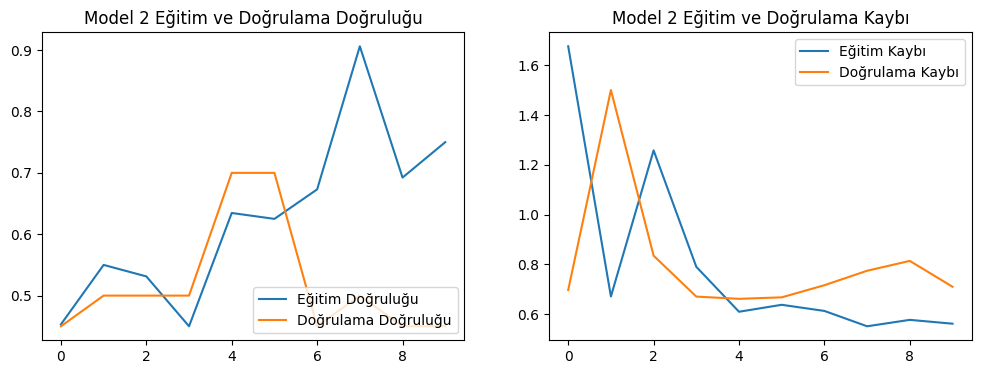

In [5]:
# Grafikleri çizdirmek
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Doğruluk Grafiği
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Eğitim Doğruluğu')
plt.plot(epochs_range, val_acc, label='Doğrulama Doğruluğu')
plt.legend(loc='lower right')
plt.title('Model 2 Eğitim ve Doğrulama Doğruluğu')

# Kayıp Grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Eğitim Kaybı')
plt.plot(epochs_range, val_loss, label='Doğrulama Kaybı')
plt.legend(loc='upper right')
plt.title('Model 2 Eğitim ve Doğrulama Kaybı')
plt.show()

In [6]:
# Doğrulama seti üzerinde değerlendirme yapma (Test seti yerine kullanılır)
print("Model 2 Doğrulama Seti Üzerinde Değerlendiriliyor...")
loss, accuracy = model_2.evaluate(validation_generator)

print(f"\nModel 2 (Temel CNN) Doğrulama Kaybı: {loss:.4f}")
print(f"Model 2 (Temel CNN) Doğrulama Doğruluğu: {accuracy:.4f}")

Model 2 Doğrulama Seti Üzerinde Değerlendiriliyor...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4500 - loss: 0.7104

Model 2 (Temel CNN) Doğrulama Kaybı: 0.7104
Model 2 (Temel CNN) Doğrulama Doğruluğu: 0.4500
